Predicted values for the next four steps:
181    3706.187135
182    3709.464437
183    3711.579500
184    3715.977536
Name: predicted_mean, dtype: float64


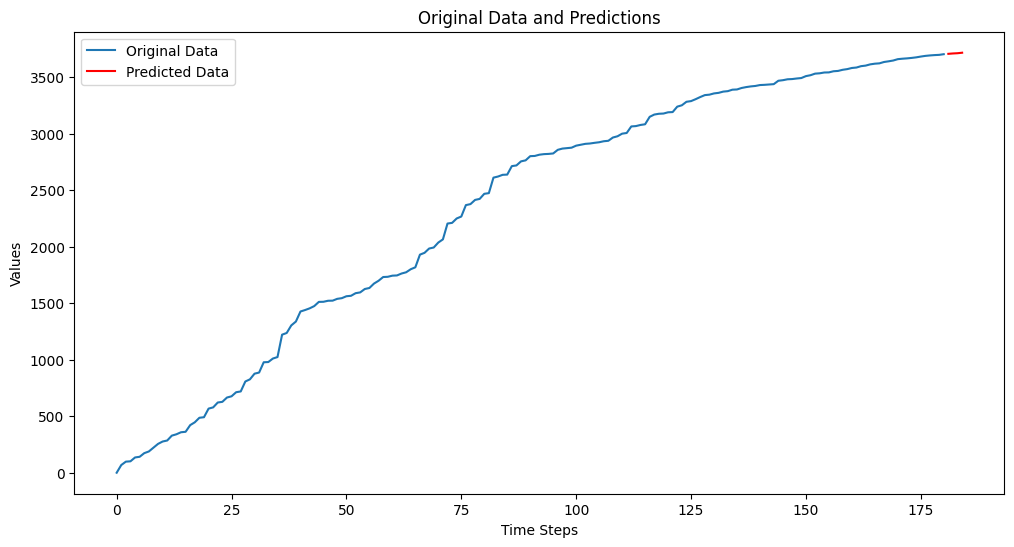

Mean Absolute Error (MAE): 113.15505010419952
Root Mean Squared Error (RMSE): 126.64584477205692


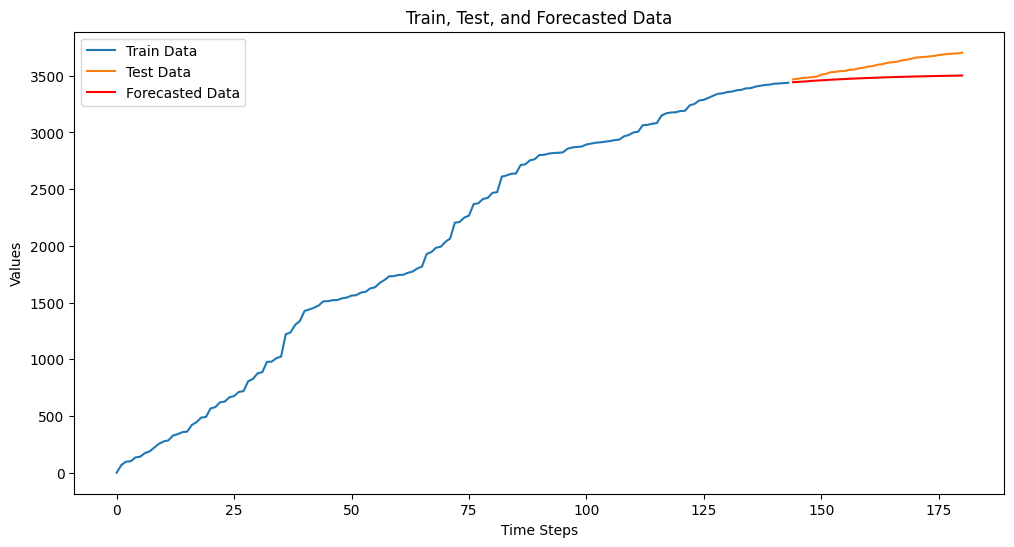

In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

file_path = 'shkol2.xlsx'
data = pd.read_excel(file_path)

data_numeric = data.iloc[0, :-4].dropna().astype(float).reset_index(drop=True)

model = ARIMA(data_numeric, order=(5,1,0))
model_fit = model.fit()

pred_steps = 4
forecast = model_fit.forecast(steps=pred_steps)

print("Predicted values for the next four steps:")
print(forecast)

extended_data = np.append(data_numeric.values, forecast.values)

plt.figure(figsize=(12, 6))
plt.plot(data_numeric, label='Original Data')
plt.plot(range(len(data_numeric), len(extended_data)), forecast, label='Predicted Data', color='red')
plt.title('Original Data and Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.savefig('Original Data and Predictions')
plt.show()

train_size = int(len(data_numeric) * 0.8)
train, test = data_numeric[:train_size], data_numeric[train_size:]

model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

test_forecast = model_fit.forecast(steps=len(test))

mae = mean_absolute_error(test, test_forecast)
rmse = np.sqrt(mean_squared_error(test, test_forecast))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data')
plt.plot(range(train_size, len(data_numeric)), test, label='Test Data')
plt.plot(range(train_size, len(data_numeric)), test_forecast, label='Forecasted Data', color='red')
plt.title('Train, Test, and Forecasted Data')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.savefig('train')
plt.show()
